# Preparar datos

In [51]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [52]:
peticions = pd.read_csv(r'C:\Users\irene\Desktop\DataAnalytics\Bootcamp\Proyecto Final\datos\2024_IRIS_Peticions_Ciutadanes_OpenData.csv',  encoding="utf-8", dtype=str)
peticions = peticions.applymap(lambda x: x.replace('""', '').strip('"') if isinstance(x, str) else x)

C:\Users\irene\AppData\Local\Temp\ipykernel_17100\4195885046.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  peticions = peticions.applymap(lambda x: x.replace('""', '').strip('"') if isinstance(x, str) else x)


In [53]:
# Creo las columnas para las fechas completas
peticions['DATA_ALTA'] = pd.to_datetime({'year': peticions['ANY_DATA_ALTA'],
                                        'month': peticions['MES_DATA_ALTA'],
                                        'day': peticions['DIA_DATA_ALTA']})

peticions['DATA_TANCAMENT'] = pd.to_datetime({'year': peticions['ANY_DATA_TANCAMENT'],
                                        'month': peticions['MES_DATA_TANCAMENT'],
                                        'day': peticions['DIA_DATA_TANCAMENT']})

In [54]:
# Creo columna duración para calcular el tiempo que se tarda en resolver las peticiones
peticions['DURADA'] = peticions['DATA_TANCAMENT'] - peticions['DATA_ALTA']

In [55]:
peticions['DURADA'] = peticions['DURADA'].astype('str')
peticions['DURADA'] = peticions['DURADA'].str.strip(' days')
peticions['DURADA'] = pd.to_numeric(peticions['DURADA'], errors='coerce')

In [56]:
# Elimino columnas que no necesitaré o estan vacias
peticions.drop('LATITUD',  axis=1, inplace=True)
peticions.drop('LONGITUD',  axis=1, inplace=True)
peticions.drop('SECCIO_CENSAL',  axis=1, inplace=True)

In [57]:
# Cambio los tipos:
variables_string = ['TIPUS', 'AREA', 'ELEMENT', 'DETALL', 'DISTRICTE', 'BARRI', 'TIPUS_VIA', 'CARRER', 'SUPORT', 'CANALS_RESPOSTA' ]
variables_int = ['DIA_DATA_ALTA', 'MES_DATA_ALTA', 'ANY_DATA_ALTA', 'DIA_DATA_TANCAMENT', 'MES_DATA_TANCAMENT', 'ANY_DATA_TANCAMENT', 'DURADA']
variables_data = ['DATA_ALTA', 'DATA_TANCAMENT']
variables_float = ['COORDENADA_X', 'COORDENADA_Y']

for col in variables_string:
    if col in peticions.columns:
        peticions[col] = peticions[col].astype(str)


for col in variables_int:
    if col in peticions.columns:
        peticions[col] = pd.to_numeric(peticions[col], errors='coerce')
        peticions[col] = peticions[col].fillna(0).astype(int)


for col in variables_data:
    if col in peticions.columns:
        peticions[col] = pd.to_datetime(peticions[col], errors='coerce')


for col in variables_float:
    if col in peticions.columns:
        peticions[col] = pd.to_numeric(peticions[col], errors='coerce', downcast='float')


In [58]:
peticions.to_csv('peticions.csv', index=False)

# Primeras exploraciones

In [59]:
peticions.columns

Index(['FITXA_ID', 'TIPUS', 'AREA', 'ELEMENT', 'DETALL', 'DIA_DATA_ALTA',
       'MES_DATA_ALTA', 'ANY_DATA_ALTA', 'DIA_DATA_TANCAMENT',
       'MES_DATA_TANCAMENT', 'ANY_DATA_TANCAMENT', 'CODI_DISTRICTE',
       'DISTRICTE', 'CODI_BARRI', 'BARRI', 'TIPUS_VIA', 'CARRER', 'NUMERO',
       'COORDENADA_X', 'COORDENADA_Y', 'SUPORT', 'CANALS_RESPOSTA',
       'DATA_ALTA', 'DATA_TANCAMENT', 'DURADA'],
      dtype='object')

In [60]:

recuento_mes= peticions['MES_DATA_ALTA'].value_counts()
media_mensual = recuento_mes.mean()
media_mensual

np.float64(20770.166666666668)

# Gráficos: Tipos 

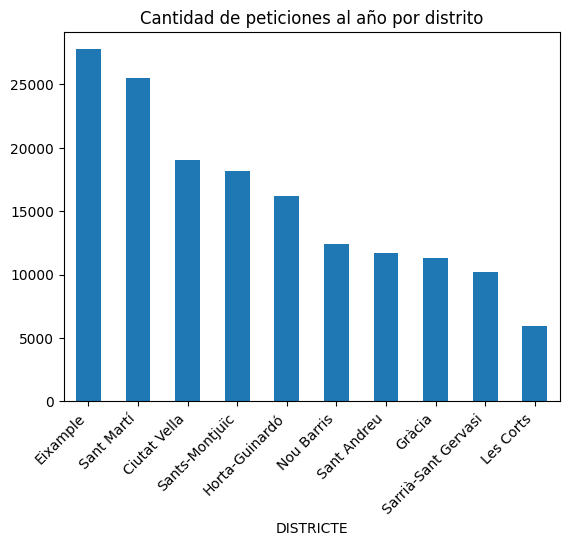

In [61]:
# Lista de valores que queremos EXCLUIR
valores_a_excluir = ['nan', 'None']
peticiones_distrito = peticions[~peticions['DISTRICTE'].isin(valores_a_excluir)]
peticiones_distrito_2024 = peticiones_distrito[peticiones_distrito['ANY_DATA_ALTA']==2024]

peticiones_distrito_año = peticiones_distrito_2024.groupby('DISTRICTE')['FITXA_ID'].count()

peticiones_distrito_año.sort_values(ascending=False).plot.bar()
plt.title('Cantidad de peticiones al año por distrito')
plt.xticks(rotation=45, ha='right');

In [63]:
# LIMPIAR LOS BARRIOS NAN Y VACIOS:

peticions_barrios_nan = peticions[(peticions['BARRI'] == 'nan')]
peticions_barrios_vacios = peticions[(peticions['BARRI'] == '')]

# Identificar filas de Barrio con NAN:
barrio_no_nan = peticions['BARRI'] != 'nan'

# Identificar filas de Barrio vacias: 
barrio_no_empty = peticions['BARRI'] != ''

# Combinar las dos condiciones en un DataFrame limpio.
peticions_limpias_barrios = peticions[barrio_no_nan & barrio_no_empty].copy()

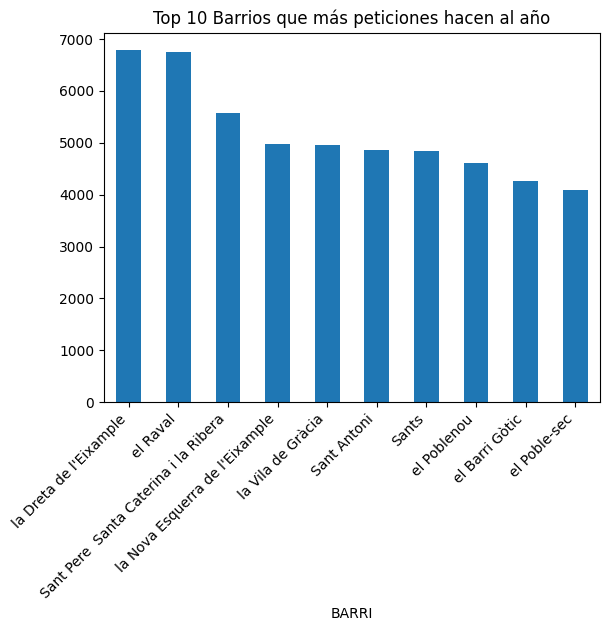

In [64]:

peticiones_barrio_2024 = peticions_limpias_barrios[peticions_limpias_barrios['ANY_DATA_ALTA']==2024]
peticiones_barrio_año = peticiones_barrio_2024.groupby('BARRI')['FITXA_ID'].count()

peticiones_barrio_año_top10 = peticiones_barrio_año.sort_values(ascending=False).head(10)
peticiones_barrio_año_top10.plot.bar()
plt.title('Top 10 Barrios que más peticiones hacen al año')
plt.xticks(rotation=45, ha='right');

In [65]:
# HACER BARRAS APILADAS PARA VER LOS TIPOS POR BARRIO. e power bi

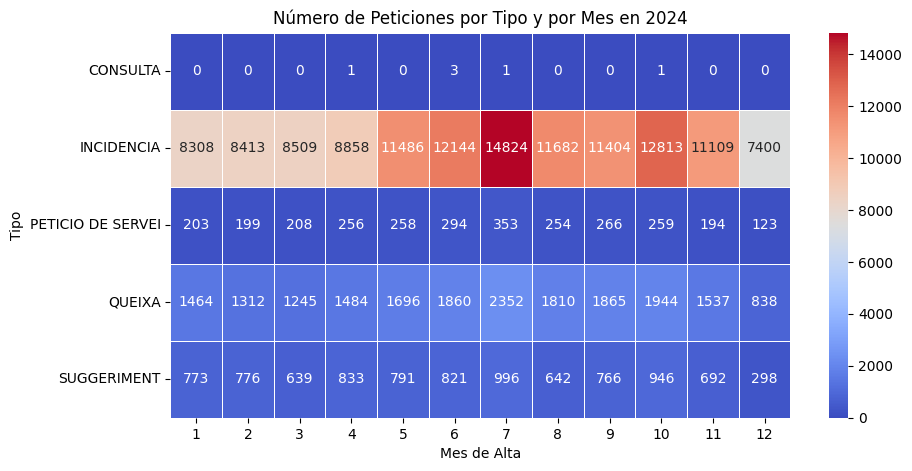

In [66]:
# Cantidad de peticiones por mes Y POR TIPO
peticiones_mes_tipo = peticiones_distrito_2024.groupby(['TIPUS', 'MES_DATA_ALTA']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 5))
sns.heatmap(peticiones_mes_tipo, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.title('Número de Peticiones por Tipo y por Mes en 2024')
plt.xlabel('Mes de Alta')
plt.ylabel('Tipo')
plt.show()

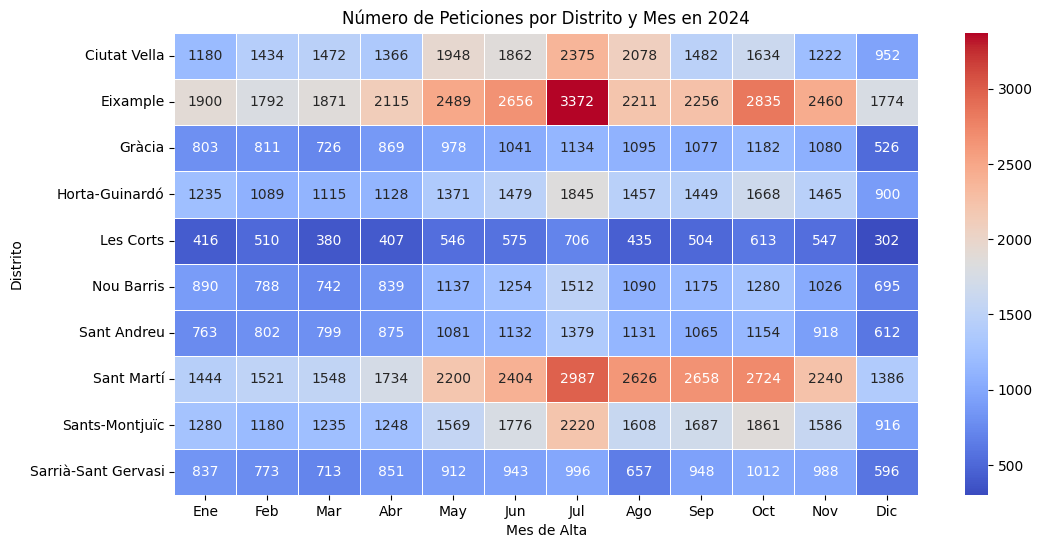

In [67]:
# Número de Peticiones por Distrito y Mes
peticions_2024 = peticions[peticions['ANY_DATA_ALTA']==2024]

peticiones_distrito_mes = peticiones_distrito_2024.groupby(['DISTRICTE', 'MES_DATA_ALTA']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(peticiones_distrito_mes, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.title('Número de Peticiones por Distrito y Mes en 2024')
plt.xlabel('Mes de Alta')
plt.ylabel('Distrito')
plt.xticks(np.arange(12) + 0.5, ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

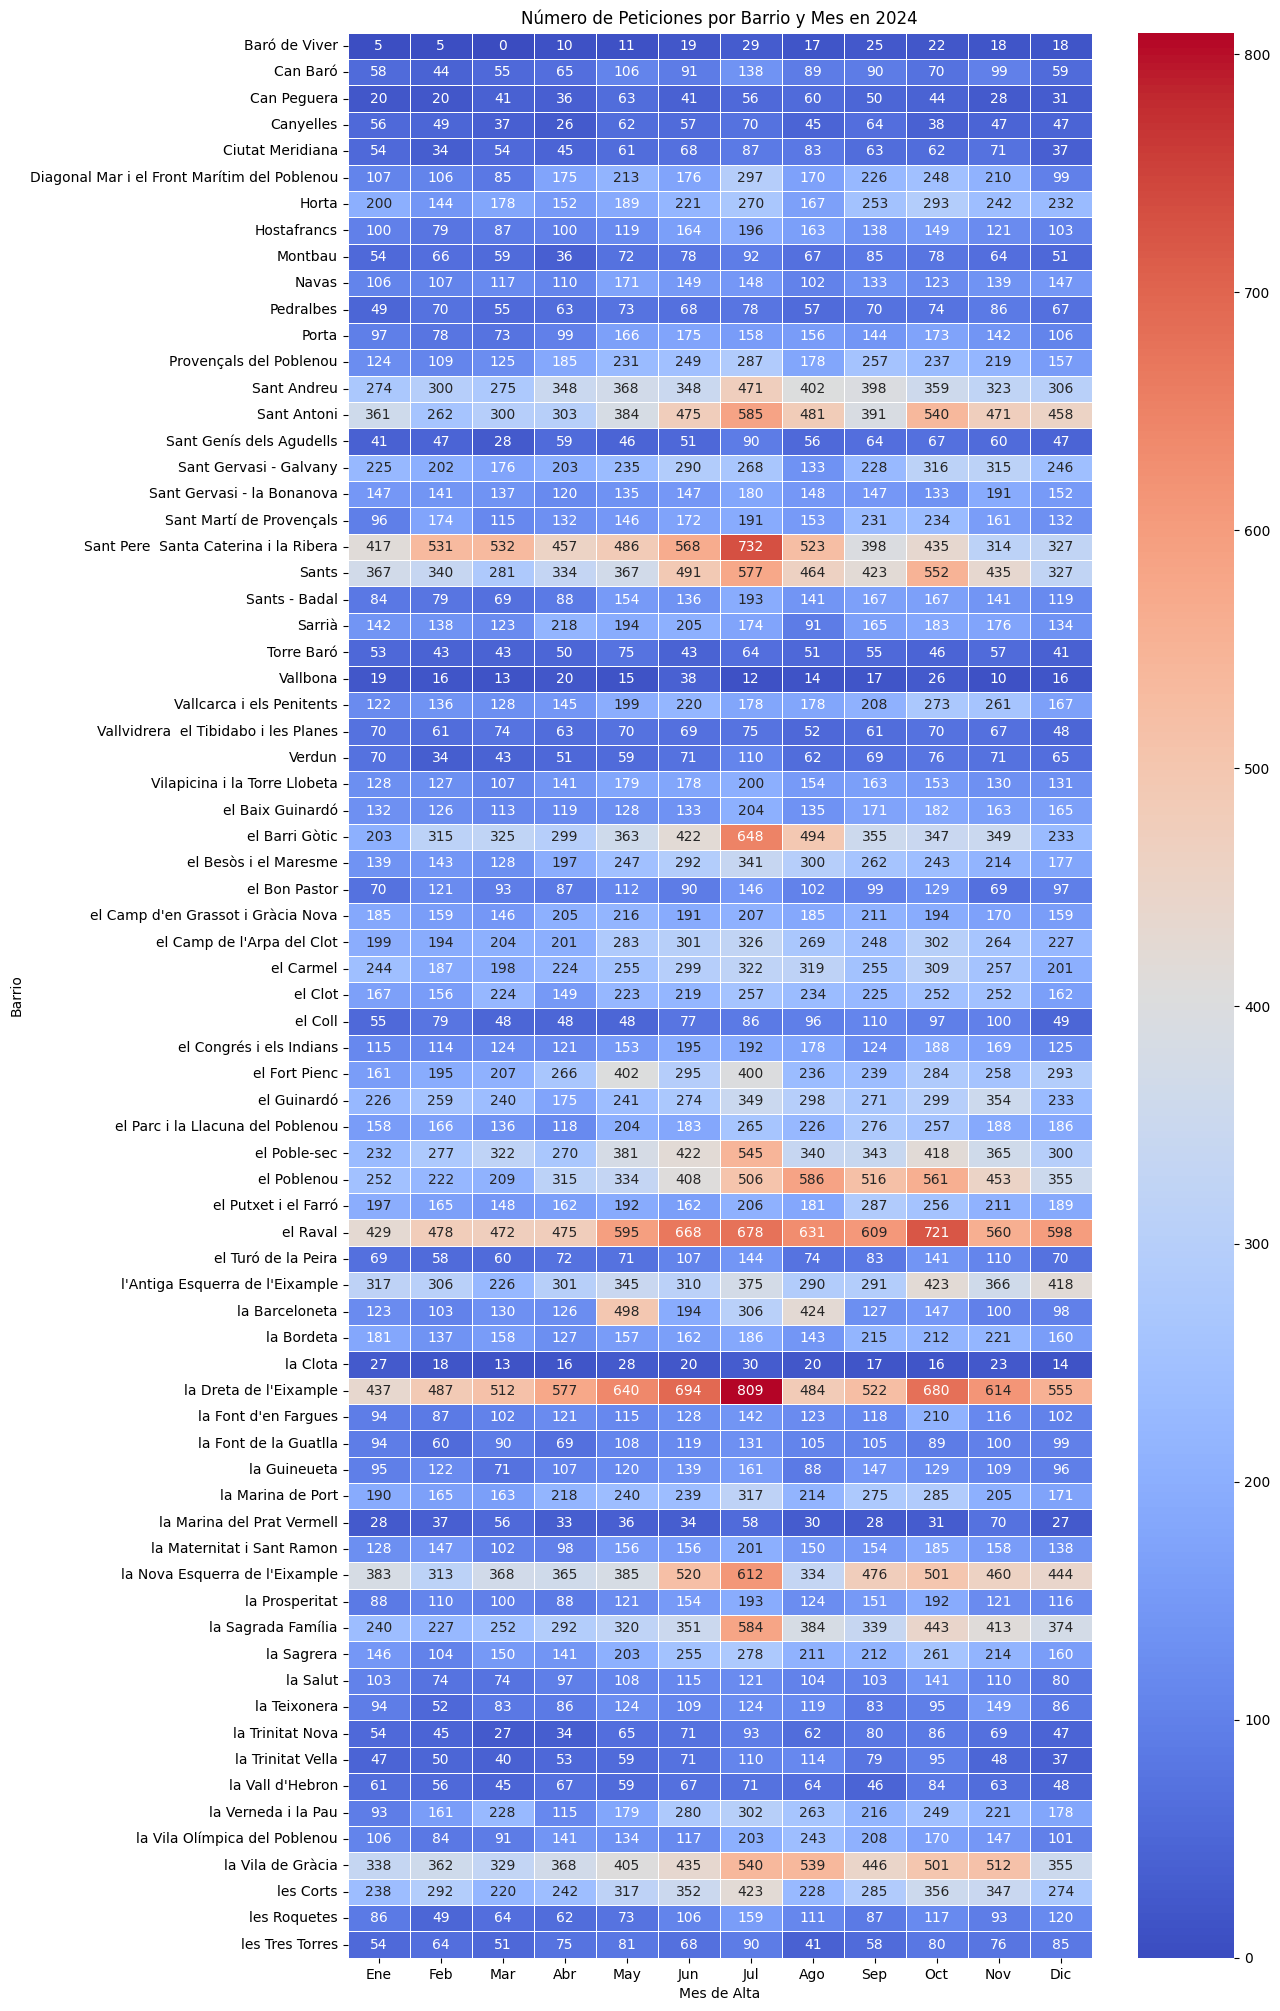

In [68]:
# Número de Peticiones por barrio y Mes
peticiones_barrio_mes = peticions_limpias_barrios.groupby(['BARRI', 'MES_DATA_ALTA']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 25))
sns.heatmap(peticiones_barrio_mes, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.title('Número de Peticiones por Barrio y Mes en 2024')
plt.xlabel('Mes de Alta')
plt.ylabel('Barrio')
plt.xticks(np.arange(12) + 0.5, ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

In [69]:
peticiones_barrio_año_top10

BARRI
la Dreta de l'Eixample                   6781
el Raval                                 6752
Sant Pere  Santa Caterina i la Ribera    5567
la Nova Esquerra de l'Eixample           4968
la Vila de Gràcia                        4953
Sant Antoni                              4853
Sants                                    4847
el Poblenou                              4602
el Barri Gòtic                           4257
el Poble-sec                             4096
Name: FITXA_ID, dtype: int64

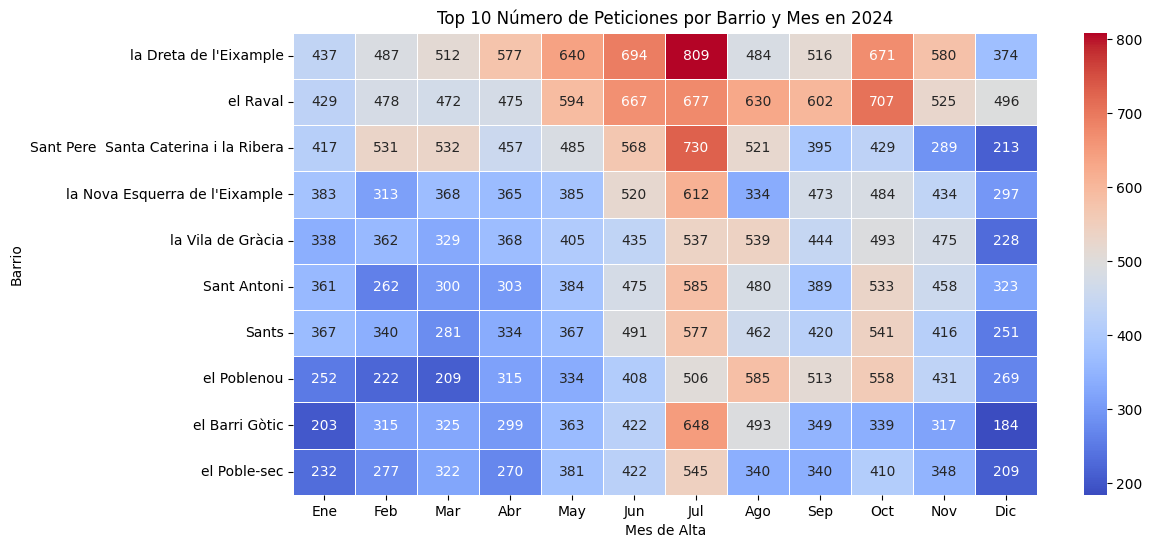

In [70]:
# Número de Peticiones por barrio y Mes TOP 10
peticiones_barrio_mes = peticions_2024.groupby(['BARRI', 'MES_DATA_ALTA']).size().unstack(fill_value=0)

lista_barrios_top10 = peticiones_barrio_año_top10.index

peticiones_barrio_mes_top10 = peticiones_barrio_mes.loc[lista_barrios_top10]

plt.figure(figsize=(12, 6))
sns.heatmap(peticiones_barrio_mes_top10, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.title('Top 10 Número de Peticiones por Barrio y Mes en 2024')
plt.xlabel('Mes de Alta')
plt.ylabel('Barrio')
plt.xticks(np.arange(12) + 0.5, ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

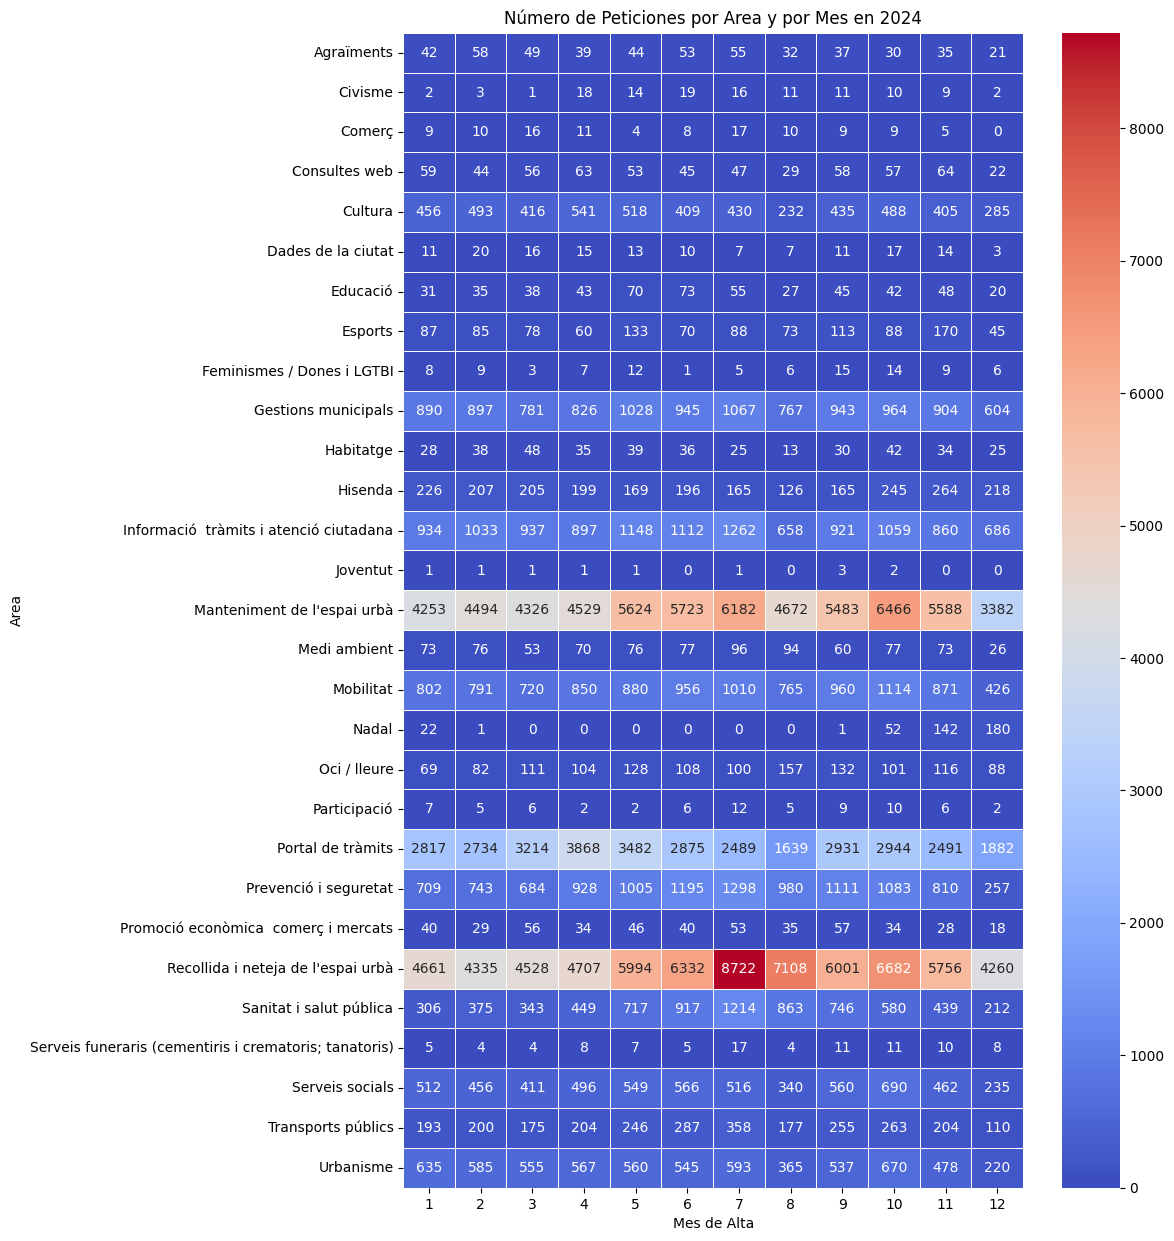

In [71]:
# Cantidad de peticiones por mes Y POR area
peticiones_mes_area = peticions_2024.groupby(['AREA', 'MES_DATA_ALTA']).size().unstack(fill_value=0)


plt.figure(figsize=(10, 15))
sns.heatmap(peticiones_mes_area, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.title('Número de Peticiones por Area y por Mes en 2024')
plt.xlabel('Mes de Alta')
plt.ylabel('Area')
plt.show()

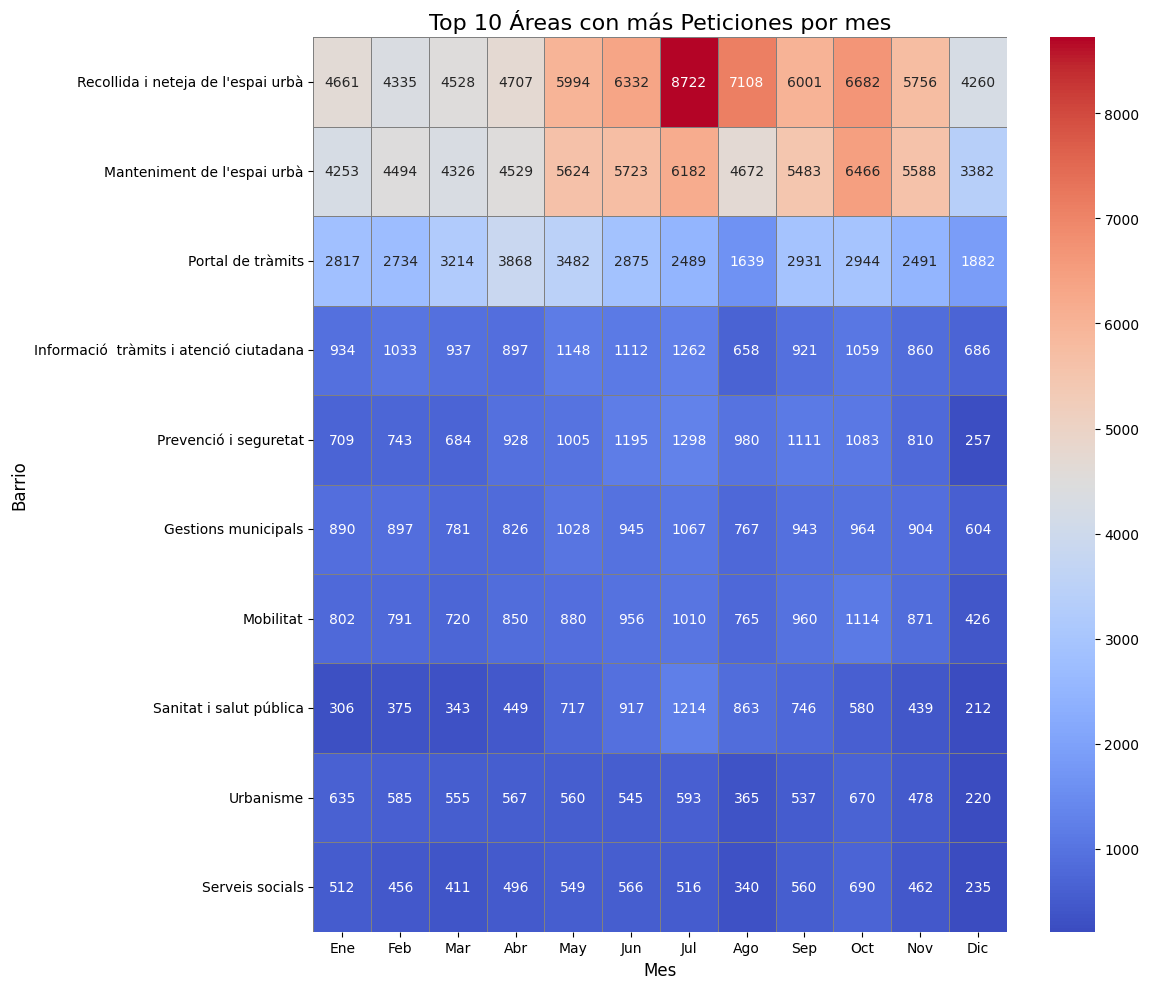

In [72]:
# TOP 10 Cantidad de peticiones por mes Y POR area
peticiones_total_area = peticiones_mes_area.sum(axis=1)

lista_areas_TOP_10 = peticiones_total_area.sort_values(ascending=False).head(10).index

top_10_peticiones_mes_area = peticiones_mes_area.loc[lista_areas_TOP_10]


# Crear el mapa de calor.
plt.figure(figsize=(12, 10))
sns.heatmap(top_10_peticiones_mes_area, annot=True, fmt="d", cmap='coolwarm', linewidths=.5, linecolor='gray')
plt.title('Top 10 Áreas con más Peticiones por mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Barrio', fontsize=12)
plt.xticks(np.arange(12) + 0.5, ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

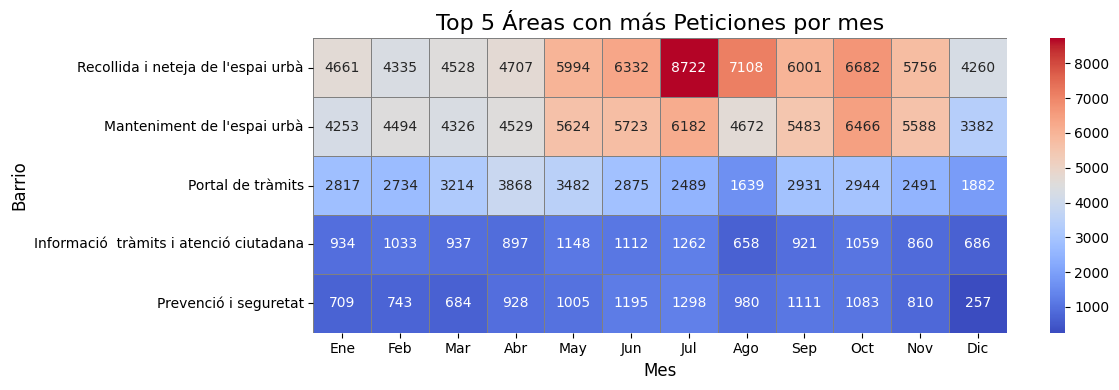

In [73]:
# TOP 5Cantidad de peticiones por mes Y POR area

lista_areas_TOP_5 = peticiones_total_area.sort_values(ascending=False).head(5).index

top_5_peticiones_mes_area = peticiones_mes_area.loc[lista_areas_TOP_5]


# Crear el mapa de calor.
plt.figure(figsize=(12, 4))
sns.heatmap(top_5_peticiones_mes_area, annot=True, fmt="d", cmap='coolwarm', linewidths=.5, linecolor='gray')
plt.title('Top 5 Áreas con más Peticiones por mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Barrio', fontsize=12)
plt.xticks(np.arange(12) + 0.5, ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Tipos de peticiones más comunes')

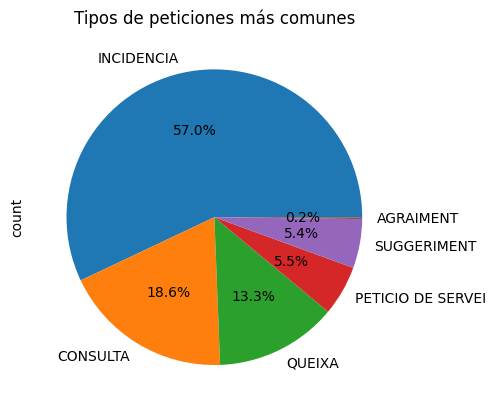

In [74]:
peticions_2024['TIPUS'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Tipos de peticiones más comunes')


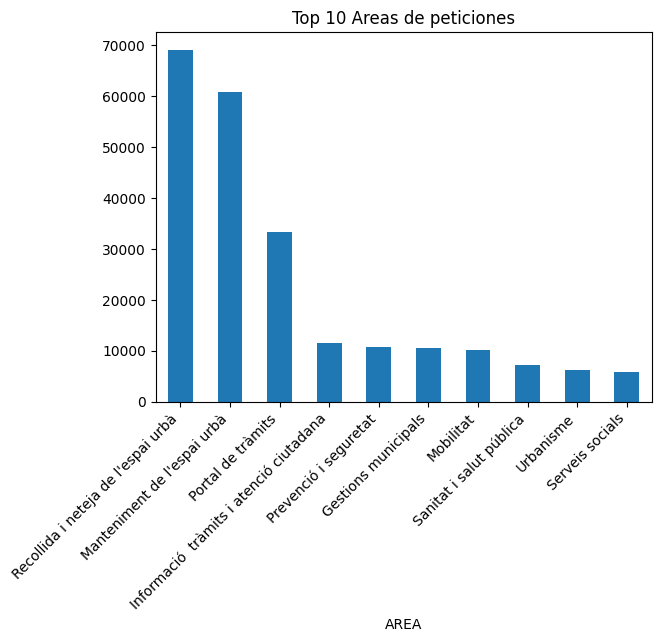

In [75]:
peticions_2024['AREA'].value_counts().head(10).plot.bar()

plt.title('Top 10 Areas de peticiones')
plt.xticks(rotation=45, ha='right');

## Arbol radial tipos_areas para flourish

In [76]:
peticions_2024['TIPUS'].value_counts()

TIPUS
INCIDENCIA           138257
CONSULTA              45074
QUEIXA                32354
PETICIO DE SERVEI     13250
SUGGERIMENT           12998
AGRAIMENT               498
Name: count, dtype: int64

In [77]:
columnas_tipos_areas =['FITXA_ID', 'TIPUS', 'AREA']

tipos_areas2024 = peticions_2024[columnas_tipos_areas]
nombre_archivo= 'tipos_areas2024.csv'
tipos_areas2024.to_csv(nombre_archivo, index=False, encoding='utf-8')

print(f"\n¡DataFrame exportado con éxito a '{tipos_areas2024}'!")


¡DataFrame exportado con éxito a '        FITXA_ID       TIPUS                         AREA
40      30968696    CONSULTA            Portal de tràmits
41      30968713  INCIDENCIA  Manteniment de l'espai urbà
42      30968705    CONSULTA            Portal de tràmits
43      30968702    CONSULTA            Portal de tràmits
44      30968711    CONSULTA            Portal de tràmits
...          ...         ...                          ...
249237  38755813    CONSULTA            Portal de tràmits
249238  38755804    CONSULTA            Portal de tràmits
249239  38755796    CONSULTA            Portal de tràmits
249240  38755893    CONSULTA            Portal de tràmits
249241  38755797   AGRAIMENT                   Agraïments

[242431 rows x 3 columns]'!


In [78]:
tipos_areas2024_agrupadas = tipos_areas2024.groupby(['TIPUS', 'AREA'])['FITXA_ID'].count().sort_values(ascending=False).reset_index()
df_para_flourish = tipos_areas2024_agrupadas.rename(columns={'FITXA_ID': 'Numero_Peticiones'})

df_para_flourish.to_excel('arbol_tipos_areas.xlsx', index=False, sheet_name='Jerarquia Peticiones')

In [79]:
df_para_flourish['Numero_Peticiones'].sum()

np.int64(242431)

In [80]:
#PORCENTAJES

df_para_flourish['%_sobre_TIPUS'] = df_para_flourish.groupby('TIPUS')['Numero_Peticiones'].transform(lambda x: (x / x.sum()) * 100).round(2)
total_general_peticiones = df_para_flourish['Numero_Peticiones'].sum()
df_para_flourish['%_sobre_TOTAL'] = (df_para_flourish['Numero_Peticiones'] / total_general_peticiones) * 100
df_para_flourish['%_sobre_TOTAL'] = df_para_flourish['%_sobre_TOTAL'].round(2)

df_para_flourish.to_excel('df_para_flourish_con%.xlsx', index=False, sheet_name='Peticiones Jerarquia %')

<Axes: xlabel='AREA'>

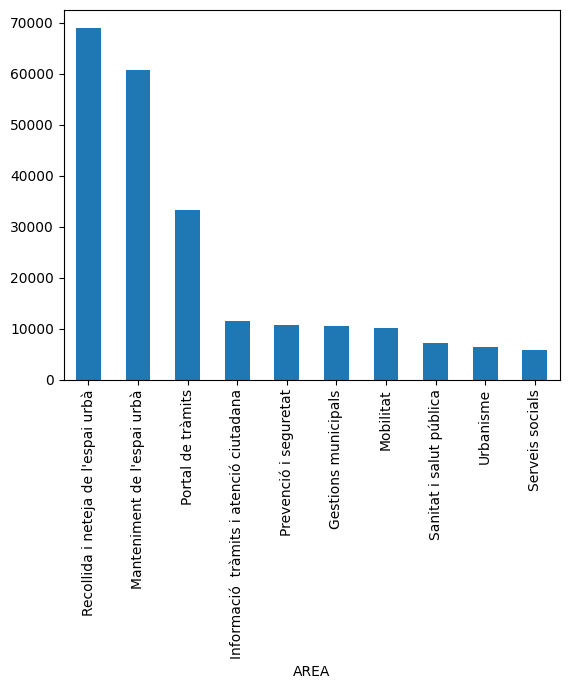

In [81]:
tipos_areas2024.groupby('AREA')['FITXA_ID'].count().sort_values(ascending=False).head(10).plot.bar()

# Gráficos: TIEMPOS/eficiencia

In [82]:
peticions['DURADA'].describe()

count    249242.000000
mean          9.100577
std          18.103905
min           0.000000
25%           1.000000
50%           3.000000
75%           9.000000
max         522.000000
Name: DURADA, dtype: float64

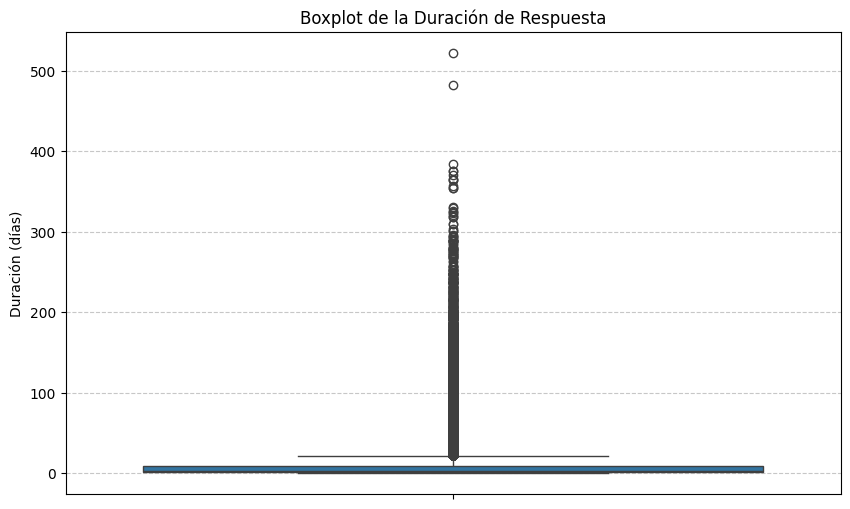

In [83]:
# con outlayers
plt.figure(figsize=(10, 6))
sns.boxplot(y=peticions['DURADA']) 
plt.title('Boxplot de la Duración de Respuesta')
plt.ylabel('Duración (días)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

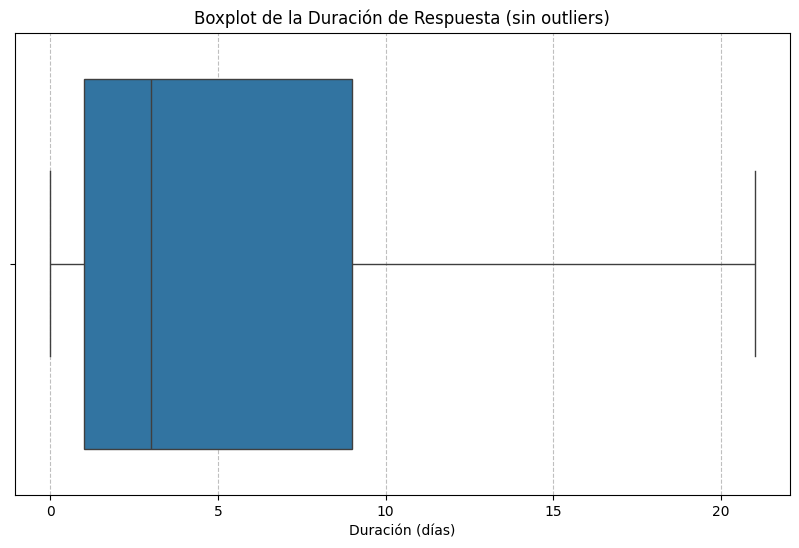

In [84]:
# Sin outlayers
plt.figure(figsize=(10, 6))
sns.boxplot(x=peticions['DURADA'], showfliers=False) # showfliers=False para no mostrar los outliers
plt.title('Boxplot de la Duración de Respuesta (sin outliers)')
plt.xlabel('Duración (días)')
plt.grid(axis='x', linestyle='--', alpha=0.8)
plt.show()

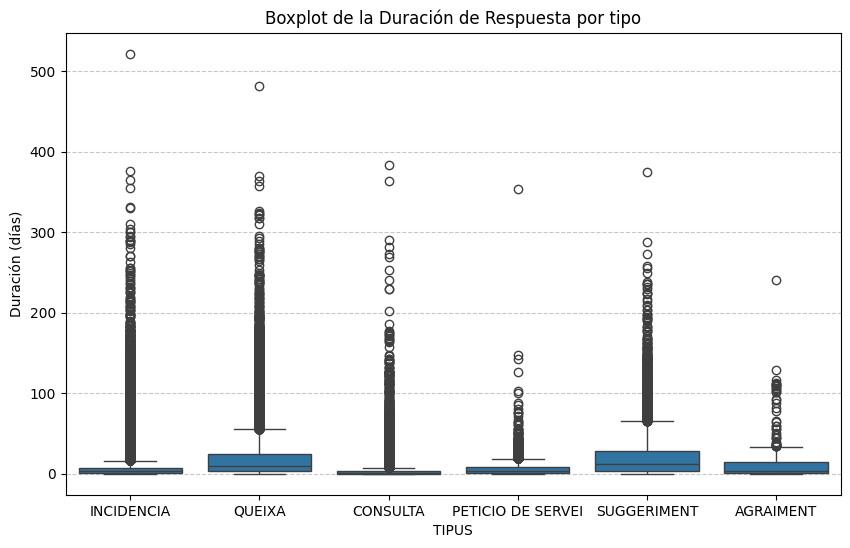

In [85]:
# Duracion respuesta por tipo
plt.figure(figsize=(10, 6))
sns.boxplot(data=peticions, x='TIPUS', 
y='DURADA') 
plt.title('Boxplot de la Duración de Respuesta por tipo')
plt.ylabel('Duración (días)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


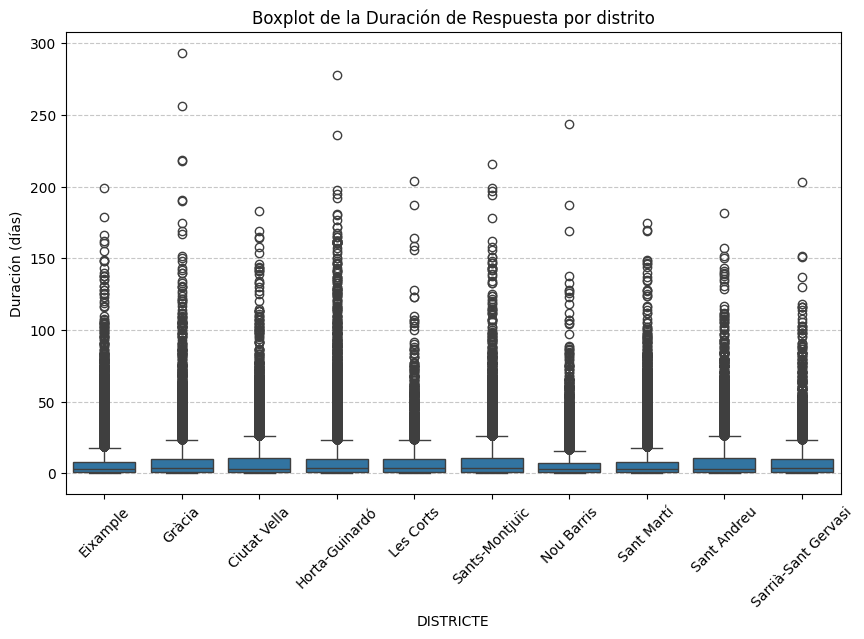

In [86]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=peticiones_distrito_2024, x='DISTRICTE', 
y='DURADA') 
plt.title('Boxplot de la Duración de Respuesta por distrito')
plt.ylabel('Duración (días)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [87]:
# para hacer viollin en flourish:
columnas_violines = ['FITXA_ID', 'TIPUS', 'AREA', 'DISTRICTE', 'BARRI', 'DURADA']
violines_flourish = peticions[columnas_violines]
violines_flourish = violines_flourish[~violines_flourish['DISTRICTE'].isin(valores_a_excluir)]


violines_flourish.to_excel('violines_flourish.xlsx', index=False, sheet_name='hoja1')

In [88]:
larga_duracion = peticions[peticions['DURADA']>= 30]
corta_duracion = peticions[peticions['DURADA'] < 30]

In [89]:
larga_duracion.shape

(16945, 25)

Text(0.5, 1.0, 'Tipos de solicitud que tienen larga duracion')

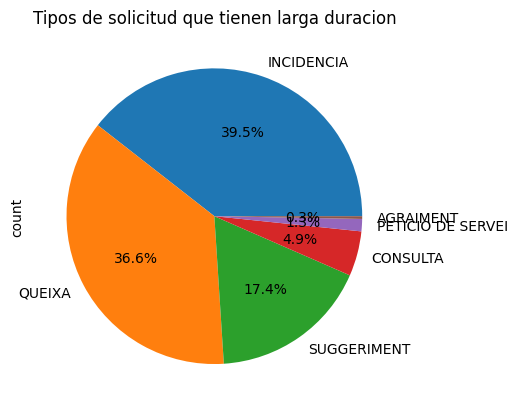

In [91]:
larga_duracion['TIPUS'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Tipos de solicitud que tienen larga duracion')

In [92]:
top_5_areas_larga_duracion = larga_duracion['AREA'].value_counts().sort_values(ascending=False).head(5)

In [93]:
top_5_areas_larga_duracion

AREA
Manteniment de l'espai urbà           4240
Recollida i neteja de l'espai urbà    2821
Prevenció i seguretat                 2589
Serveis socials                       2033
Mobilitat                             1325
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 5 Areas de solicitud que tienen larga duracion')

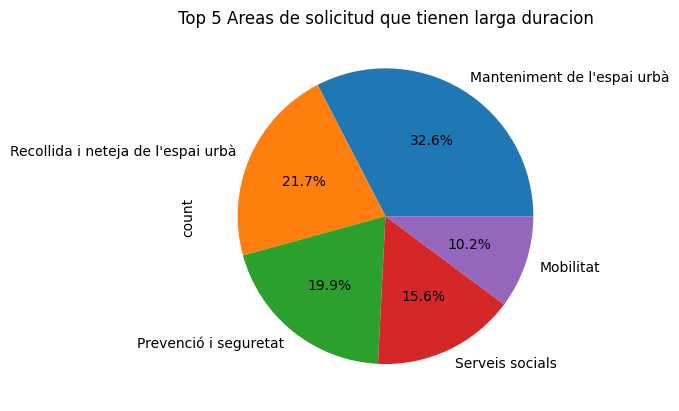

In [94]:
# Para quizas meter más recursos en estas areas
top_5_areas_larga_duracion.plot.pie(autopct='%1.1f%%')
plt.title('Top 5 Areas de solicitud que tienen larga duracion')

In [95]:
lista_top_5_areas_larga_duracion = top_5_areas_larga_duracion.index
lista_top_5_areas_larga_duracion

Index(['Manteniment de l'espai urbà', 'Recollida i neteja de l'espai urbà',
       'Prevenció i seguretat', 'Serveis socials', 'Mobilitat'],
      dtype='object', name='AREA')

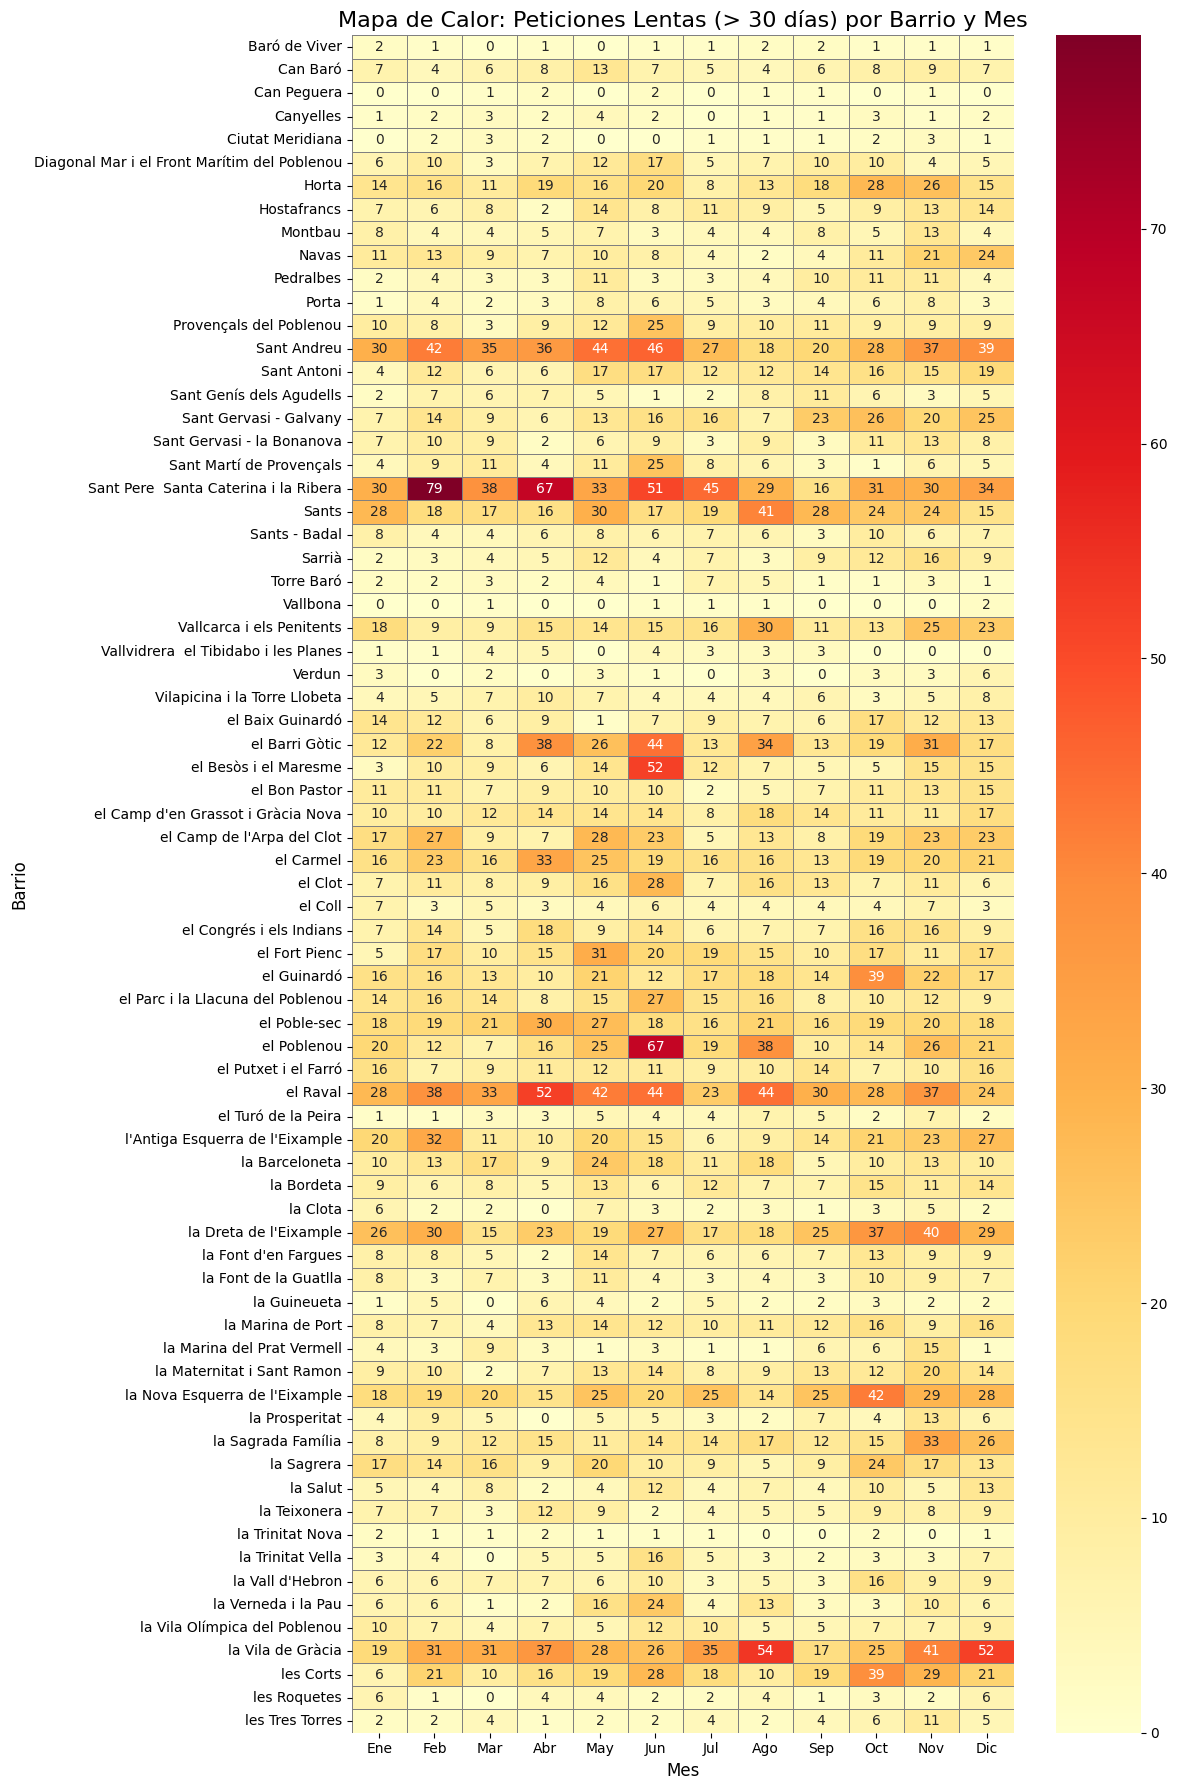

In [96]:
#  con los barrios '' y 'nan' eliminados:

areas_lentas_top5 = peticions_limpias_barrios[(peticions_limpias_barrios['AREA'].isin(lista_top_5_areas_larga_duracion)) &
    (peticions_limpias_barrios['DURADA'] > 30)]

areas_lentas_barrio_mes = areas_lentas_top5.groupby(['BARRI', 'MES_DATA_ALTA']).size().unstack(fill_value=0)

import numpy as np
plt.figure(figsize=(12, 18))
sns.heatmap(areas_lentas_barrio_mes, annot=True, fmt="d", cmap="YlOrRd", linewidths=.5, linecolor='gray')
plt.title('Mapa de Calor: Peticiones Lentas (> 30 días) por Barrio y Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Barrio', fontsize=12)
plt.xticks(np.arange(12) + 0.5, ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

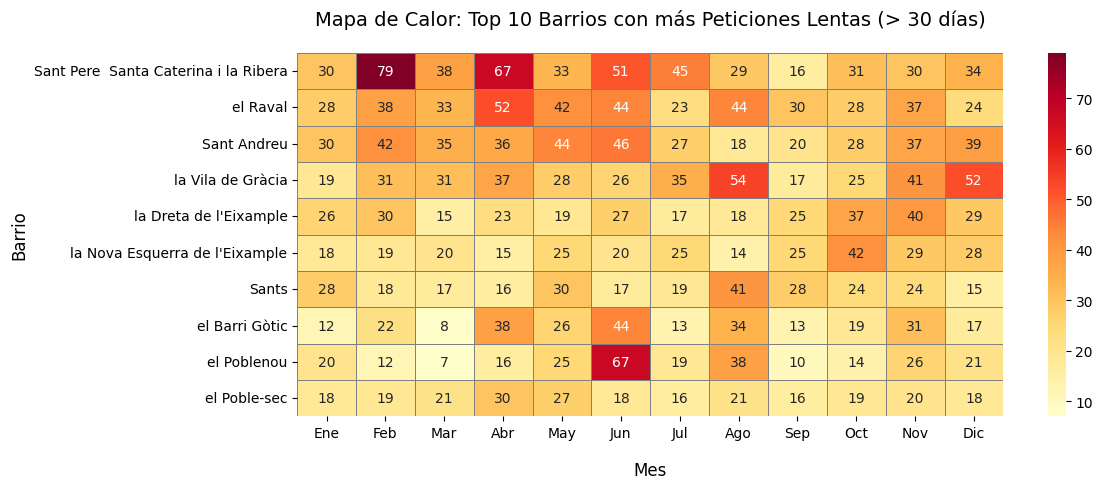

In [97]:
# heatmap con top 10 barrios con mas peticiones lentas, distribuido por meses


# 1. Calcular cantidad total de peticiones lentas per barrio, para identificar el top barrios.
total_peticiones_lentas_por_barrio = areas_lentas_barrio_mes.sum(axis=1).sort_values(ascending=False)

# 2. Seleccionar el top 10 barrios en base a la cuenta del total.
top_10_barrios = total_peticiones_lentas_por_barrio.head(10).index

# 3. Filtrar el original:
areas_lentas_top_barrios = areas_lentas_barrio_mes.loc[top_10_barrios]

# 4. El heatmap.
plt.figure(figsize=(12, 5))
sns.heatmap(areas_lentas_top_barrios, annot=True, fmt="d", cmap="YlOrRd", linewidths=.5, linecolor='gray')
plt.title('Mapa de Calor: Top 10 Barrios con más Peticiones Lentas (> 30 días)', fontsize=14, pad=20)
plt.xlabel('Mes', fontsize=12, labelpad=15)
plt.ylabel('Barrio', fontsize=12)
plt.xticks(np.arange(12) + 0.5, ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# canales de comunicacion

<Axes: ylabel='count'>

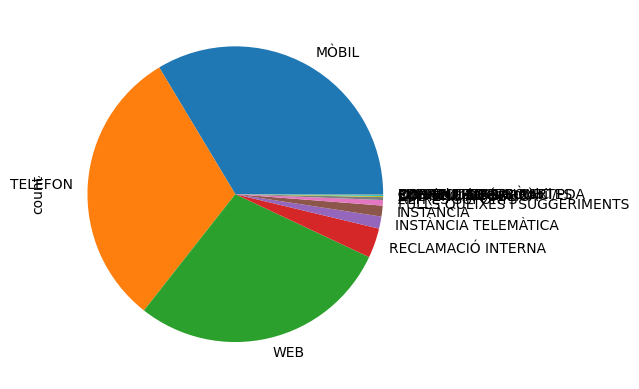

In [98]:
canales_com = ()
peticions['SUPORT'].value_counts().plot.pie()

# Gráficos históricos temporal 
- Explorar las fechas en las que se producen más solicitudes
- Ver histórico

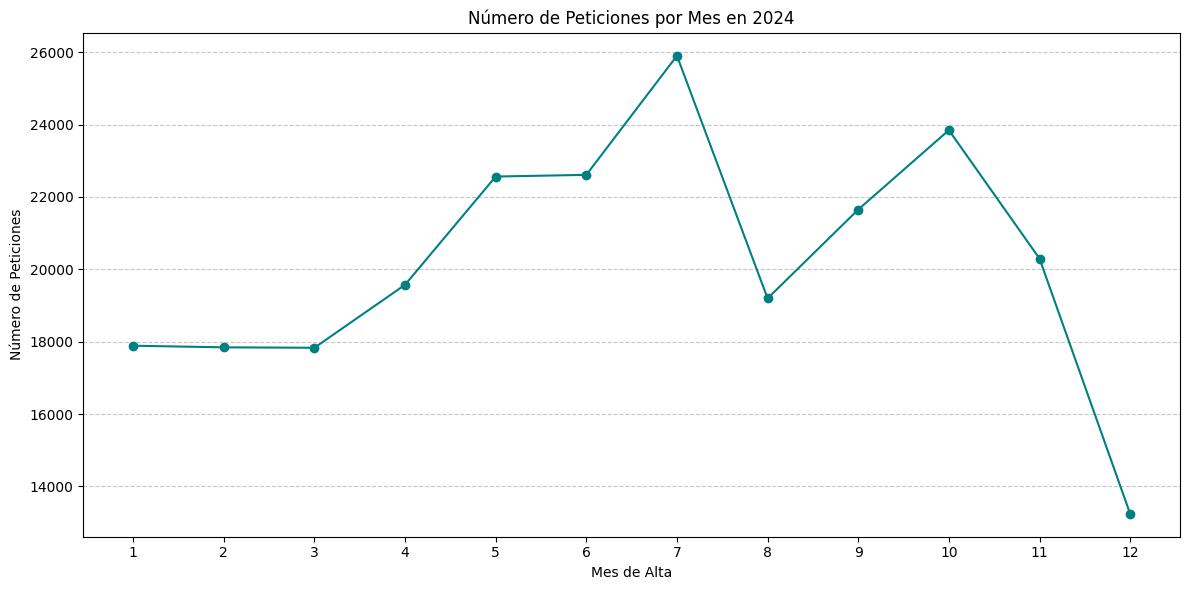

In [99]:
peticions_2024 = peticions[peticions['ANY_DATA_ALTA']==2024]
peticiones_por_mes2024 = peticions_2024.groupby('MES_DATA_ALTA').size()

peticiones_por_mes2024 = peticiones_por_mes2024.reset_index(name='NUMERO_PETICIONES')

plt.figure(figsize=(12, 6))
plt.plot(peticiones_por_mes2024['MES_DATA_ALTA'], peticiones_por_mes2024['NUMERO_PETICIONES'], marker='o', linestyle='-', color='teal')
plt.title('Número de Peticiones por Mes en 2024')
plt.xlabel('Mes de Alta')
plt.ylabel('Número de Peticiones')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [100]:
df2023 = pd.read_csv(r"C:\Users\irene\Desktop\DataAnalytics\Bootcamp\Proyecto Final\datos\2023_IRIS_Peticions_Ciutadanes_OpenData.csv")
df2022 = pd.read_csv(r"C:\Users\irene\Desktop\DataAnalytics\Bootcamp\Proyecto Final\datos\2022_IRIS_Peticions_Ciutadanes_OpenData.csv")
df2021 = pd.read_csv(r"C:\Users\irene\Desktop\DataAnalytics\Bootcamp\Proyecto Final\datos\2021_IRIS_Peticions_Ciutadanes_OpenData.csv")
df2020 = pd.read_csv(r"C:\Users\irene\Desktop\DataAnalytics\Bootcamp\Proyecto Final\datos\2020_IRIS_Peticions_Ciutadanes_OpenData.csv")
df2019 = pd.read_csv(r"C:\Users\irene\Desktop\DataAnalytics\Bootcamp\Proyecto Final\datos\2019_peticions_ciutadanes.csv")


In [101]:
lista_dfs = [df2019, df2020, df2021, df2022, df2023]

for df in lista_dfs:

    # Creo las columnas para las fechas completas
    df['DATA_ALTA'] = pd.to_datetime({'year': df['ANY_DATA_ALTA'],
                                            'month': df['MES_DATA_ALTA'],
                                            'day': df['DIA_DATA_ALTA']})

    df['DATA_TANCAMENT'] = pd.to_datetime({'year': df['ANY_DATA_TANCAMENT'],
                                            'month': df['MES_DATA_TANCAMENT'],
                                            'day': df['DIA_DATA_TANCAMENT']})

    # Creo columna duración para calcular el tiempo que se tarda en resolver las peticiones
    df['DURADA'] = df['DATA_TANCAMENT'] - df['DATA_ALTA']

    df['DURADA'] = df['DURADA'].astype('str')
    df['DURADA'] = df['DURADA'].str.strip(' days')
    df['DURADA'] = pd.to_numeric(df['DURADA'], errors='coerce')

## Historico temporal (cantidad peticiones al mes)

In [102]:
columnas_temp = ['FITXA_ID', 'DURADA', 'MES_DATA_ALTA','ANY_DATA_ALTA']
tempo2019 = df2019[columnas_temp]
tempo2020 = df2020[columnas_temp]
tempo2021 = df2021[columnas_temp]
tempo2022 = df2022[columnas_temp]
tempo2023 = df2023[columnas_temp]
tempo2024 = peticions[columnas_temp]

In [103]:
lista_dfs = [tempo2019, tempo2020, tempo2021, tempo2022, tempo2023, tempo2024]

df_tempo_unificado = pd.concat(lista_dfs, ignore_index=True)
df_tempo_unificado = df_tempo_unificado.drop_duplicates(subset=['FITXA_ID'], keep='first')

df_tempo_unificado = df_tempo_unificado[df_tempo_unificado['ANY_DATA_ALTA'] > 2018]
df_tempo_unificado.to_csv('df_tempo_unificado.csv', index=False, encoding='utf-8')

In [104]:
df_tempo_unificado.to_csv('df_tempo_unificado2.csv', index=False, encoding='utf-8')

In [105]:
df_tempo_unificado.shape

(1430434, 4)

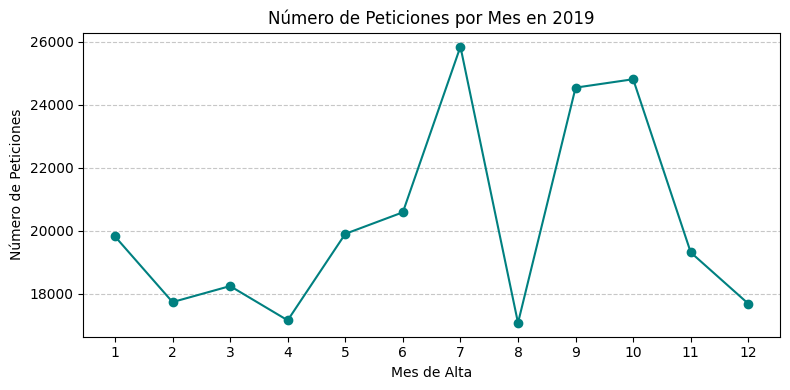

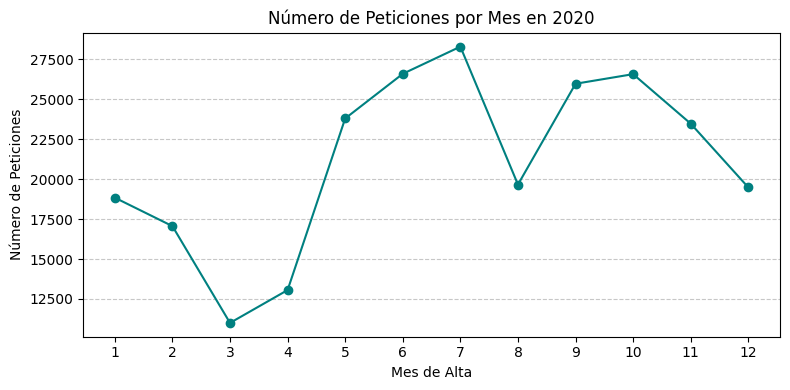

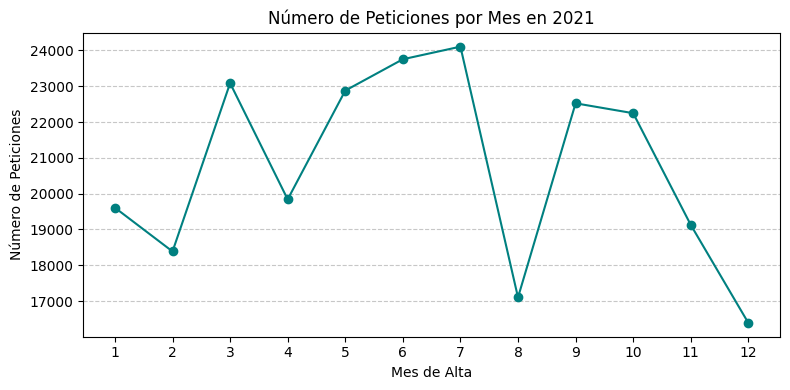

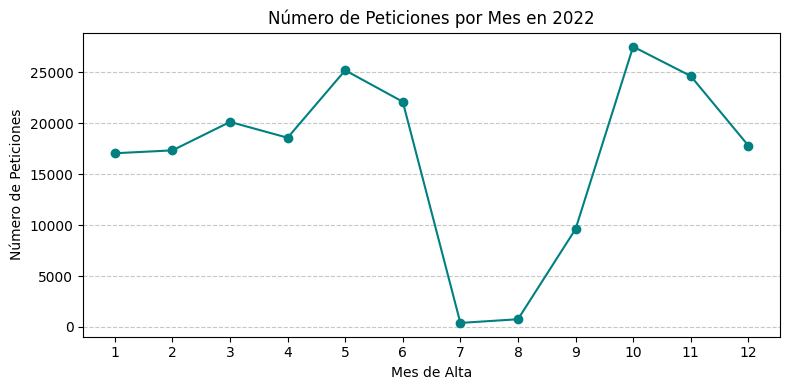

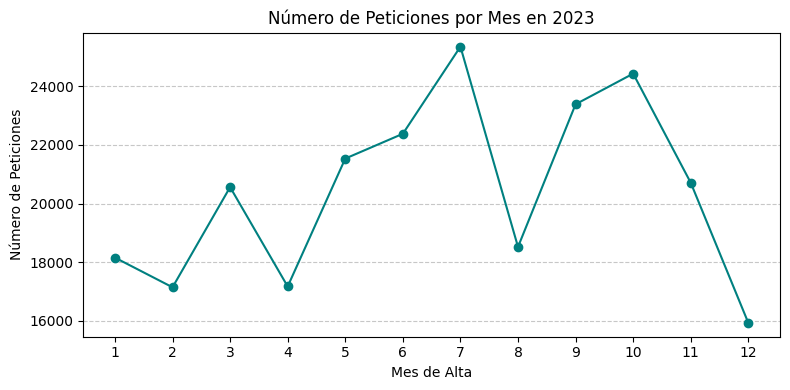

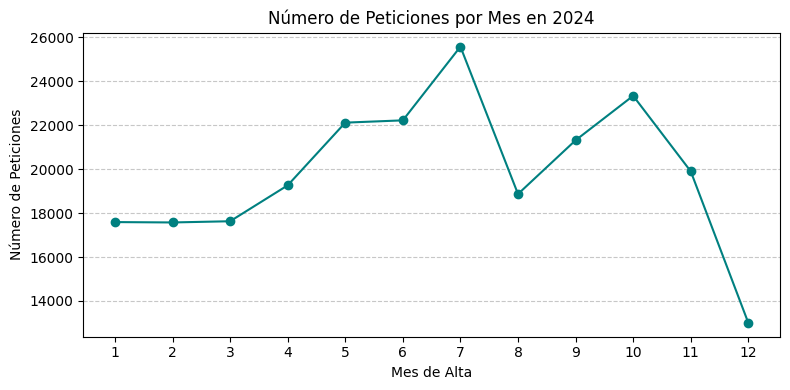

In [106]:
# Crear el Bucle para Generar Gráficos por Año
años_disponibles = sorted(df_tempo_unificado['ANY_DATA_ALTA'].unique())

for año in años_disponibles:
    peticiones_por_año = df_tempo_unificado[df_tempo_unificado['ANY_DATA_ALTA'] == año]

    peticiones_por_mes_anual = peticiones_por_año.groupby('MES_DATA_ALTA').size().reset_index(name='NUMERO_PETICIONES')

    # Asegurarse de que todos los meses (1-12) estén presentes, incluso si no hay datos, y en ese caso llenarlos con 0
    todos_los_meses = pd.DataFrame({'MES_DATA_ALTA': range(1, 13)})
    peticiones_por_mes_anual = pd.merge(todos_los_meses, peticiones_por_mes_anual, on='MES_DATA_ALTA', how='left').fillna(0)

    # Crear el gráfico de líneas
    plt.figure(figsize=(8, 4))
    plt.plot(peticiones_por_mes_anual['MES_DATA_ALTA'], peticiones_por_mes_anual['NUMERO_PETICIONES'],
             marker='o', linestyle='-', color='teal') # Usamos el mismo color para consistencia

    plt.title(f'Número de Peticiones por Mes en {año}')
    plt.xlabel('Mes de Alta')
    plt.ylabel('Número de Peticiones')
    plt.xticks(range(1, 13))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()